<a href="https://colab.research.google.com/github/wannleach/MAT-421/blob/main/ModuleB1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Chapter 17: Interpolation (Part 1)**

*17.1: Interpolation Problem Statement*

Interpolation is a technique used to estimate unknown values given a countable data set. This differs from regression which seeks to find the "line of best fit" for a set of data to find trends and relationships. 


The example below demonstrates basic interpolation using varying values. In this example, I used the relationship y=2x to create my values. While I did not provide this equation to the program, interpolation was used to accurately predict the value of x=19.5.

21.0


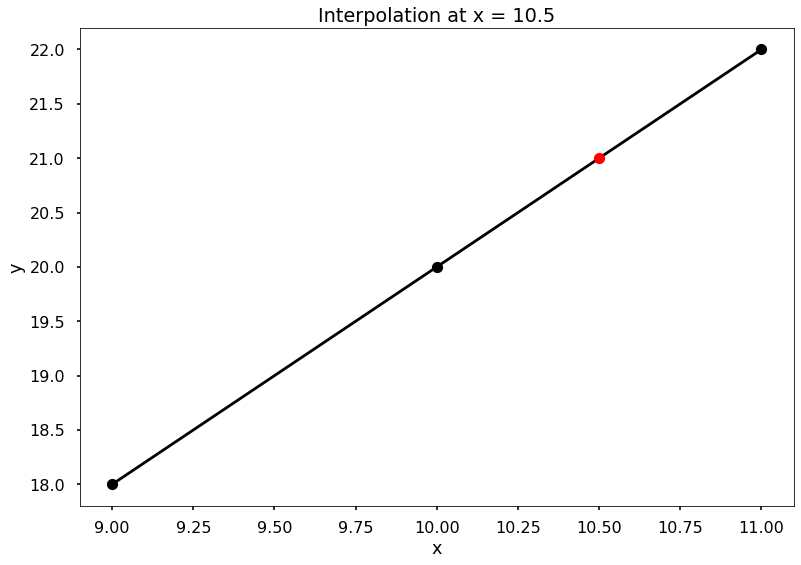

In [ ]:
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt

plt.style.use('seaborn-poster')

# values to plot
x = [9, 10, 11] # independent values
y = [18, 20, 22] # dependent on x

# interpolation
f = interp1d(x,y) # interpolates with x vs y
y_est = f(10.5) # the value of x=9.5 is estimated
print(y_est)

# plotting
plt.figure()
plt.plot(x, y, '-ok')
plt.plot(10.5, y_est, 'ro')
plt.title('Interpolation at x = 10.5')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

*17.2: Linear Interpolation*

Linear interpolation assumes the estimated value lies on a straight line between its closest left and right values. The following equation is used to provide this linear estimate: 
$$\hat{y}(x) = y_i + \frac{(y_{i+1} - y_i)(x-x_i)}{(x_{i+1}-x_i)}$$.


Plugging in the sets $x$ and $y$ into the above equation to estimate a value of $x=10.5$ yields the following estimation:
$$\hat{y}(10.5) = 20 + (22 - 20)(10.5 - 10)/(11 - 10) = 21$$


Below, the sets $x$ and $y$ (slightly different than that used in Section 17.1 above) are used with Python's interpolation function to estimate the value of $x=10.5$, showing the same value graphically as found in the calculation above:

21.0


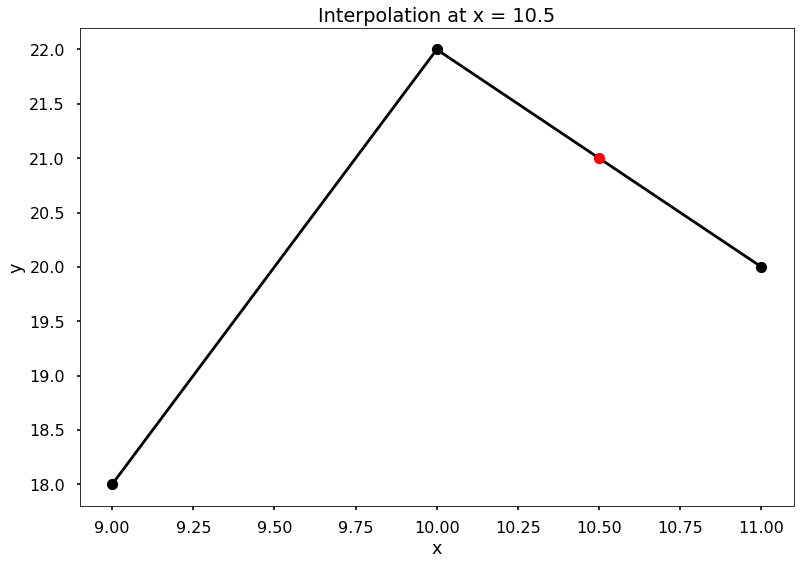

In [1]:
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt

plt.style.use('seaborn-poster')

# values to plot
x = [9, 10, 11] # independent values
y = [18, 22, 20] # dependent on x

# interpolation
f = interp1d(x,y) # interpolates with x vs y
y_est = f(10.5) # the value of x=9.5 is estimated
print(y_est)

# plotting
plt.figure()
plt.plot(x, y, '-ok')
plt.plot(10.5, y_est, 'ro')
plt.title('Interpolation at x = 10.5')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

*Cubic Spline Interpolation*

Cubic spline interpolation utilizes a cubic curve to estimate different  values from a data set, as cubic curves are fairly smooth (with a second continous derivative) and thus yield more accurate results. The main analytical method for this technique is as follows:


For each two adjacent points, a cubic curve is created to make one large piecewise cubic "spliced" curve. This is represented by the following equations (using 3 plot points without loss of generality):
$$a_1{x_1}^3 + b_1{x_1}^2 + c_1x_1 + d_1 = y_1$$
$$a_1{x_2}^3 + b_1{x_2}^2 + c_1x_2 + d_1 = y_1$$
$$a_2{x_1}^3 + b_2{x_1}^2 + c_2x_1 + d_2 = y_2$$
$$a_2{x_2}^3 + b_2{x_2}^2 + c_2x_2 + d_2 = y_2$$

Where the curves touch, the derivative is calculated to add to the system of equations to be able to find all unknowns:
$$3a_1{x_2}^2 + 2b_1x_2 + c_1 = 3a_2{x_2}^2 + 2b_2x_2 + c_2$$
$$3a_2{x_3}^2 + 2b_2x_3 + c_2 = 3a_3{x_3}^2 + 2b_3x_3 + c_3$$

For the same reasoning, the second derivative is calculated in the same places (where the curves touch):
$$6a_1x_2 + 2b_2x_3 + c_2 = 6a_2x_2 + 2b_2$$
$$6a_2x_3 + 2b_2 = 6a_3x_3 + 2b_3$$

For the three points represented by sets $x$ and $y$ in Section 17.2, the following points are used in the system of equations:
$$f(9) = 18$$
$$f(10) = 22$$
$$f(10) = 22$$
$$f(11) = 20$$


The following matrix represents the system of equations for $x$ and $y$:
$$\matrix{729 & 81 & 9 & 1 & 0 & 0 & 0 & 0 \cr 0 & 0 & 0 & 0 & 1000 & 100 & 10 & 1 \cr 1000 & 100 & 10 & 1 & 0 & 0 & 0 & 0 \cr 0 & 0 & 0 & 0 & 1331 & 121 & 11 & 0 \cr 300 & 20 & 1 & 0 & -300 & -20 & -1 & 0 \cr 363 & 22 & 1 & 0 & -363 & -22 & -1 & 0 \cr 0 & 0 & 66 & 2 & 0 & 0 & -66 & -2} * \matrix{a_1 \cr b_1 \cr c_1 \cr d_1 \cr a_2 \cr b_2 \cr c_2 \cr d_2}=\matrix{18 \cr 22 \cr 22 \cr 20 \cr 0 \cr 0 \cr 0 \cr 0}$$

This system is then solved to find two cubic polynomials, one for estimating between $(9,18)$ and $(10,22)$ and the other for estimating between $(10,22)$ and $(11,20)$.

In Python, cubic interpolation utilizes "CubicSpline" function to estimate values, utilizing a similar process as the one shown above:

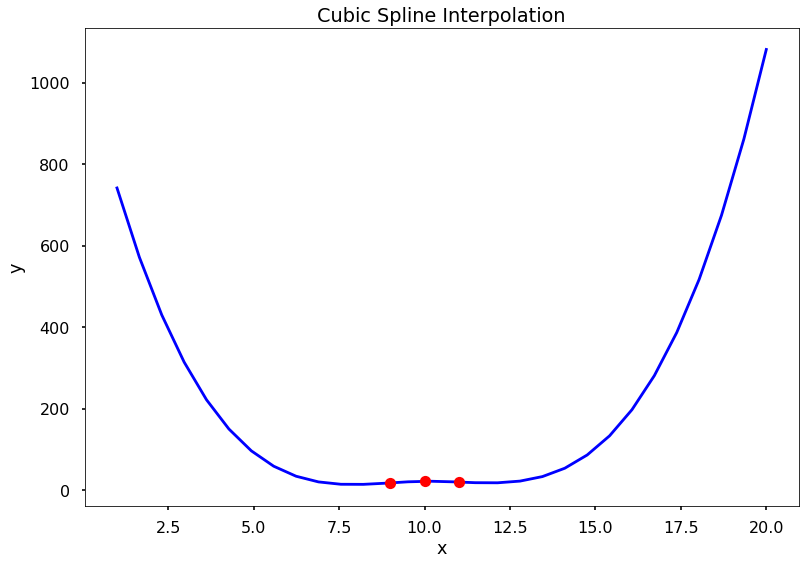

In [11]:
from scipy.interpolate import CubicSpline
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('seaborn-poster')

x = [9, 10, 11]
y = [18, 22, 20]

# use bc_type = 'natural' adds the constraints as we described above
f = CubicSpline(x, y, bc_type='natural')
x_est = np.linspace(20, 1, 30)
y_est = f(x_est) # create the points for the new cubic estimate curve

plt.figure()
plt.plot(x_est, y_est, 'b') # plot the cubic estimate curve
plt.plot(x, y, 'ro') # plot the points
plt.title('Cubic Spline Interpolation')
plt.xlabel('x')
plt.ylabel('y')
plt.show()